In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
#housing.csv file is read and stored in a variable housing_data
housing_data= pd.read_csv('housing.csv')
print(housing_data.shape)

(2413, 18)


In [3]:
# creating variables X_housing_data which contain all the other columns except Sale Price and Y_housing_data that contains only Sale Price
X_housing_data=housing_data.drop(columns=['Sale_Price'])
Y_housing_data=housing_data['Sale_Price']

In [4]:
# Calculating descriptive statistics, figure 1 in report
housing_data.describe()

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,55.462495,10060.208040,1969.436386,1022.827600,1133.857024,339.242851,1.539163,0.377953,2.854538,1.040199,0.602984,-93.642391,42.033730,175567.643183
std,33.542416,8222.759854,29.487943,408.977848,366.442470,423.198488,0.544667,0.498467,0.813430,0.200642,0.648911,0.026159,0.018015,70979.614441
min,0.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.693153,41.986498,35000.000000
25%,37.000000,7390.000000,1953.000000,784.000000,866.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-93.661562,42.021547,129500.000000
50%,60.000000,9360.000000,1971.000000,970.000000,1060.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,-93.640326,42.034569,159000.000000
75%,77.000000,11404.000000,1998.000000,1246.000000,1350.000000,704.000000,2.000000,1.000000,3.000000,1.000000,1.000000,-93.621485,42.047997,206900.000000
max,313.000000,215245.000000,2010.000000,3206.000000,3820.000000,1872.000000,4.000000,2.000000,6.000000,3.000000,4.000000,-93.577427,42.063381,755000.000000


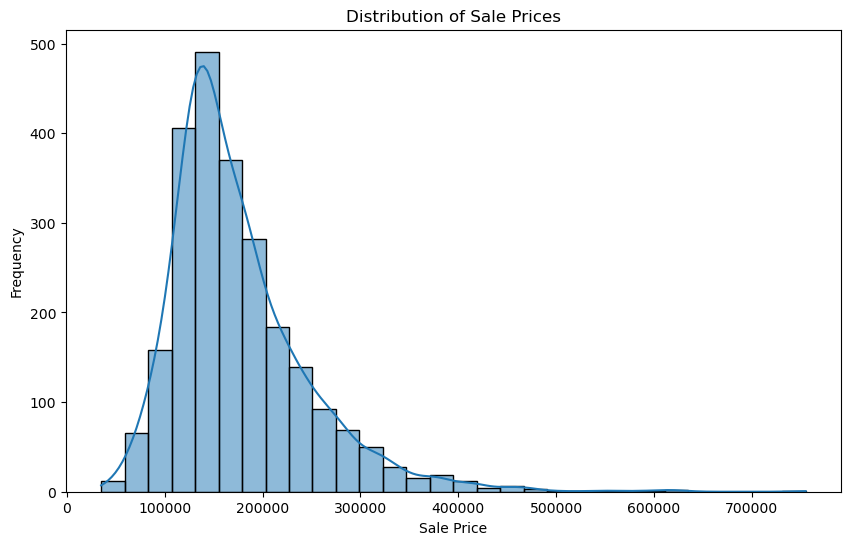

In [5]:
# Visualizing Sale_Price to understand its distribution, figure 2 in report

plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Sale_Price'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Determing skewness in Sales Price
housing_data['Sale_Price'].skew()

1.7453580480340125

In [7]:
#list of numerical variables
numerical_features = [feature for feature in housing_data.columns if housing_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
housing_data[numerical_features].head()

Number of numerical variables:  14


,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1960,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,1961,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,1958,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,1968,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,1997,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900


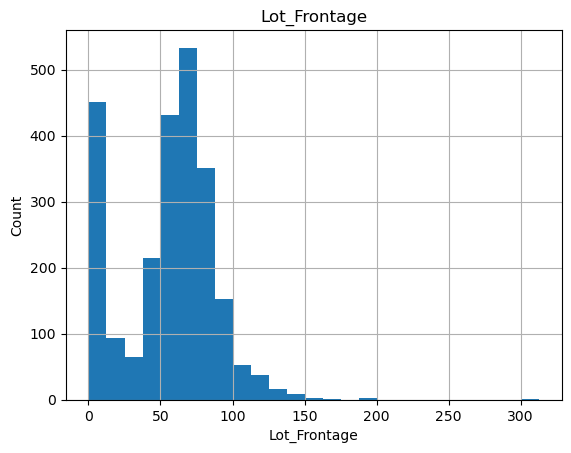

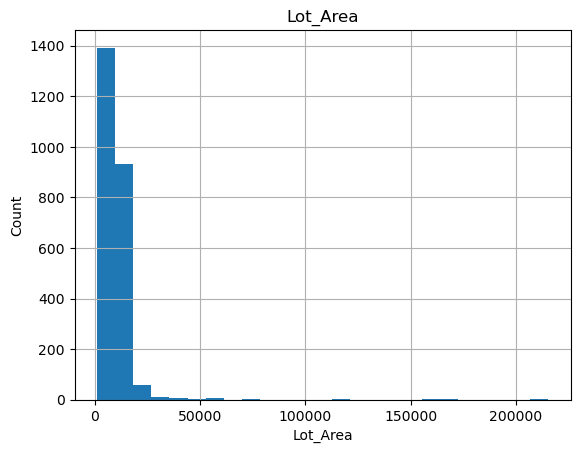

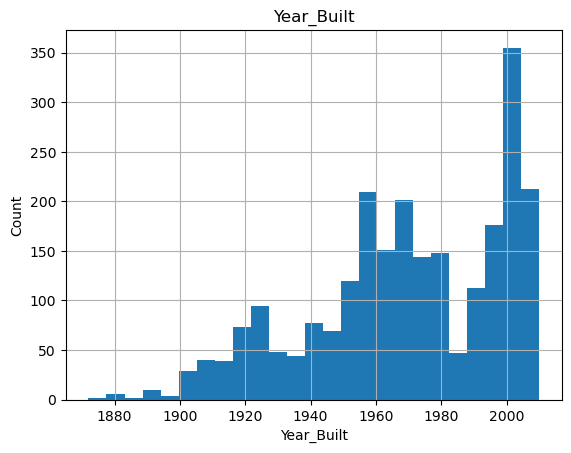

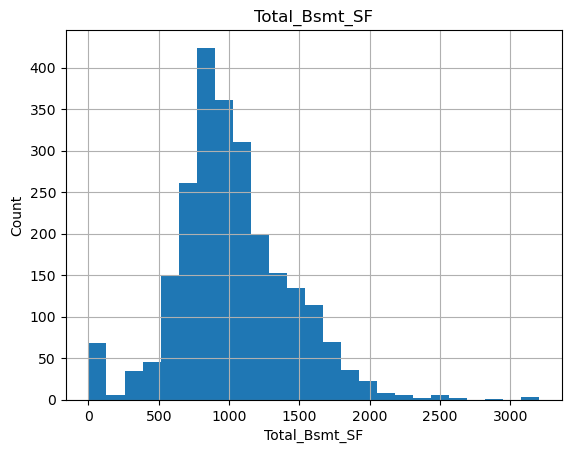

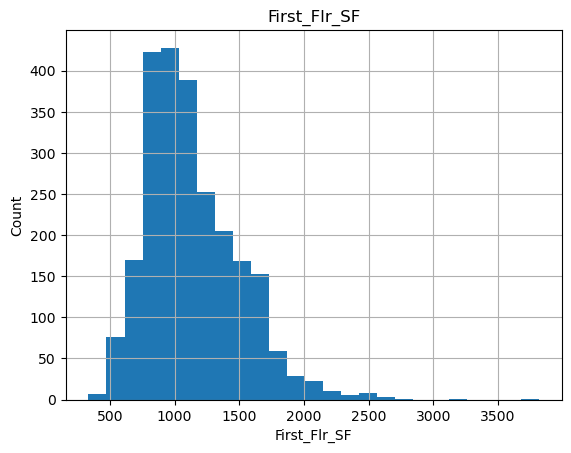

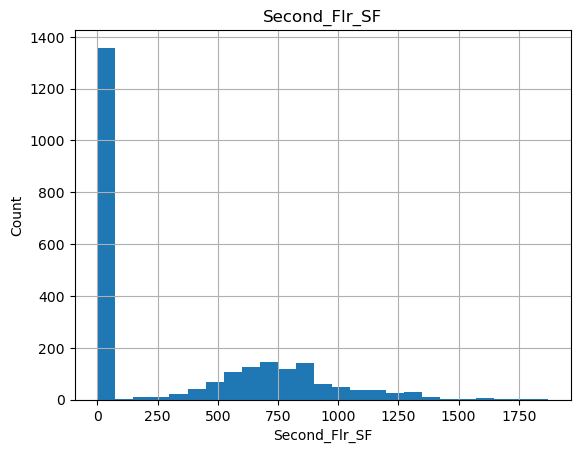

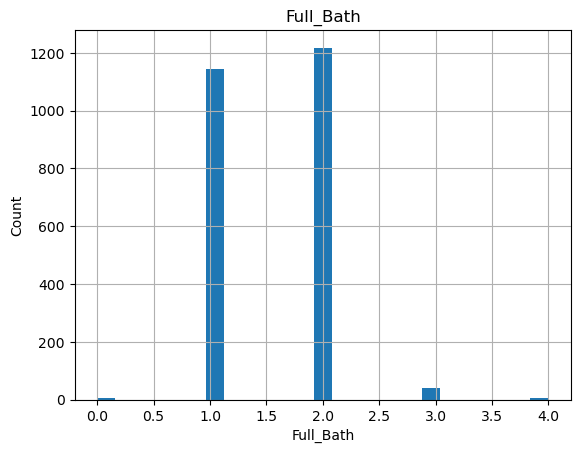

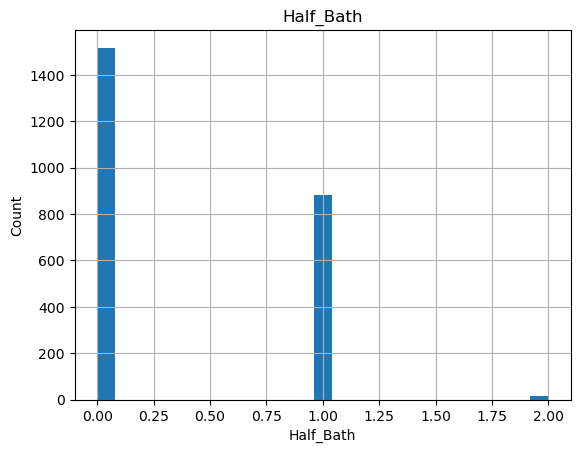

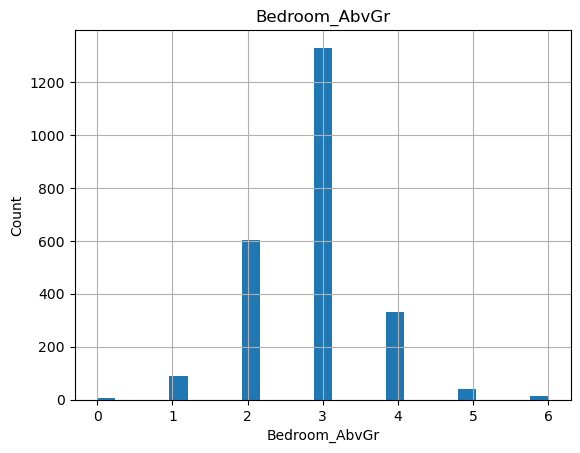

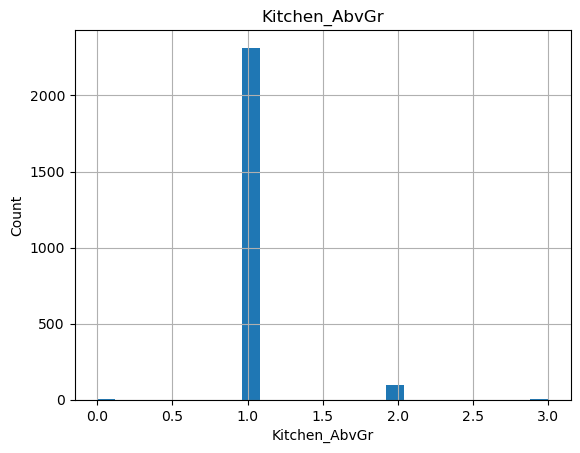

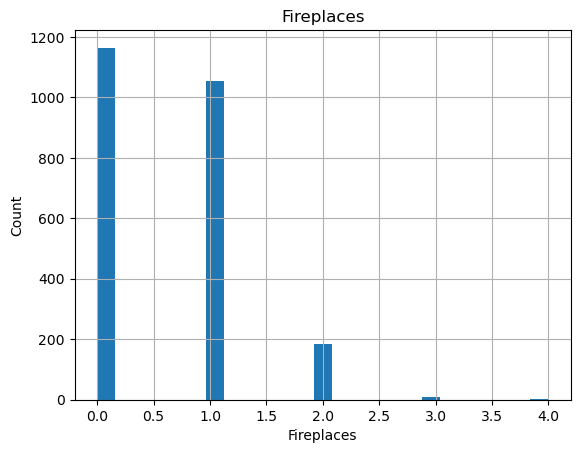

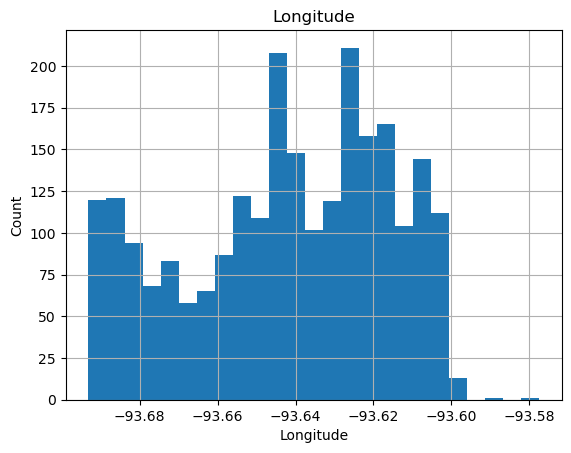

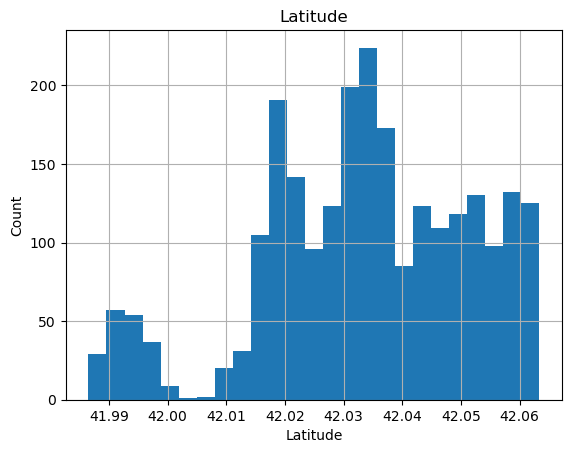

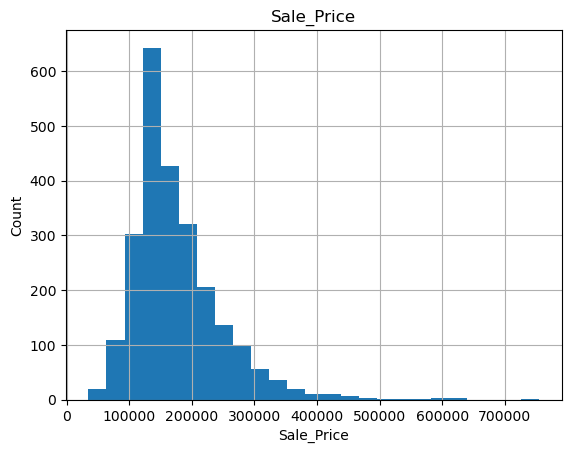

In [8]:
# Visualizing numerical features to understand distribution
import matplotlib.pyplot as plt
for feature in numerical_features:
    data=housing_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


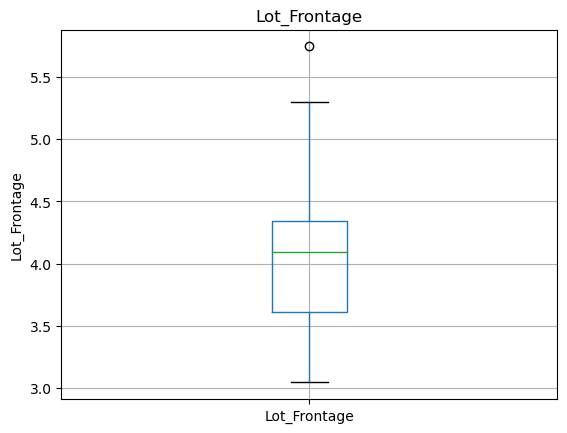

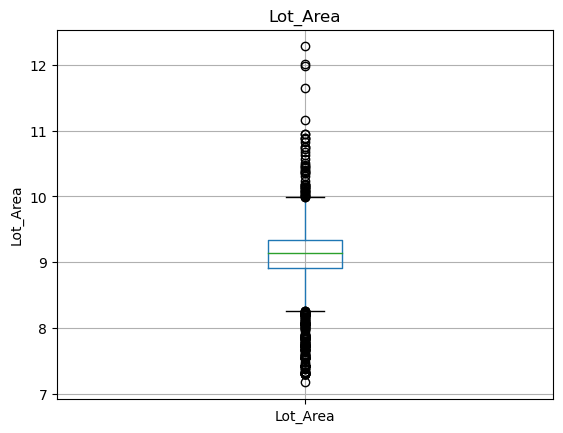

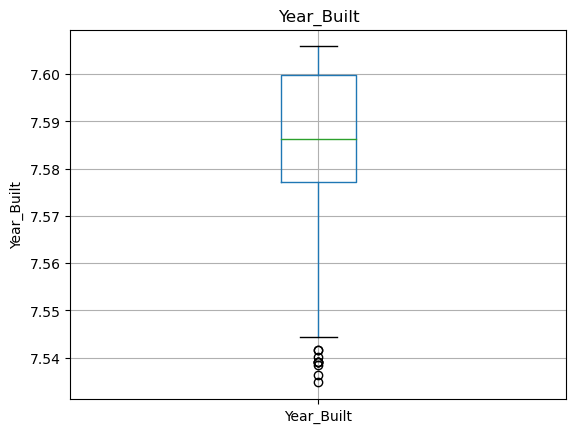

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


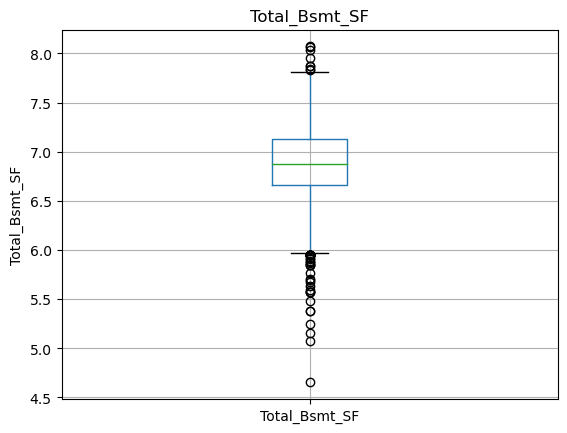

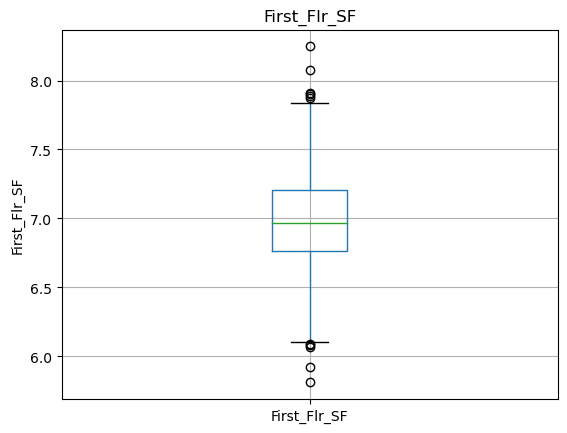

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kushagra/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


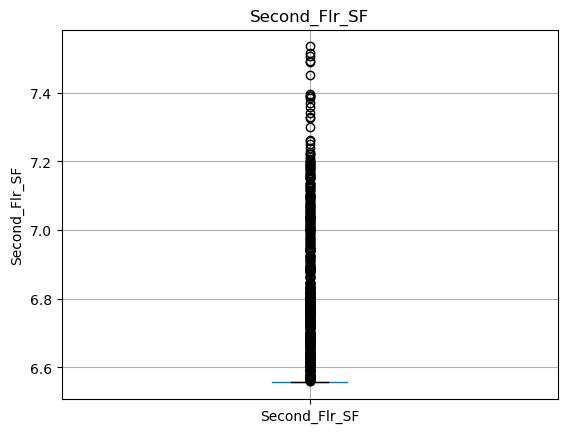

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


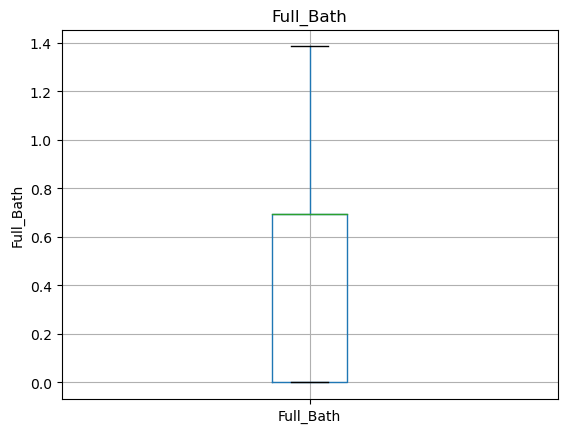

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kushagra/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


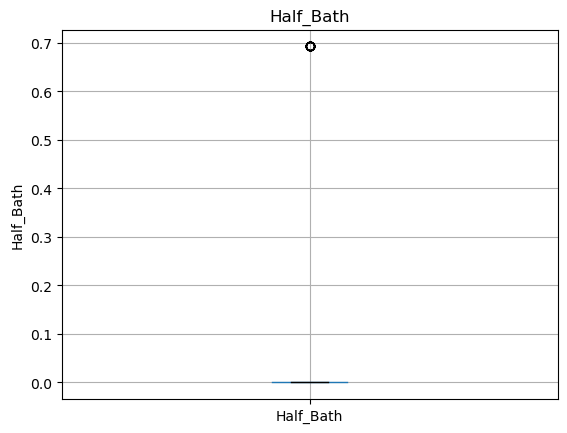

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


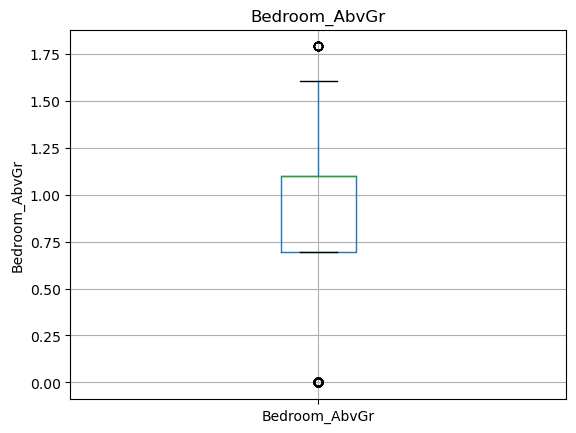

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


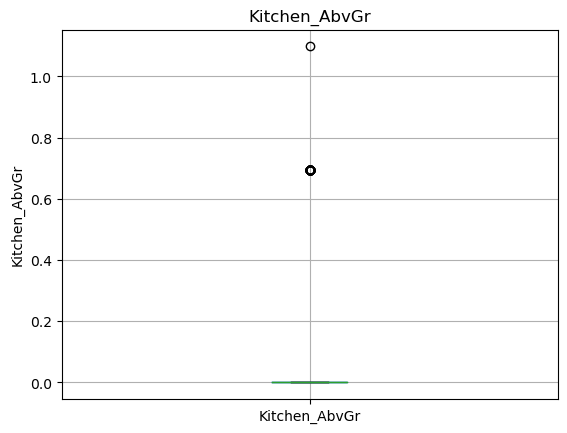

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kushagra/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


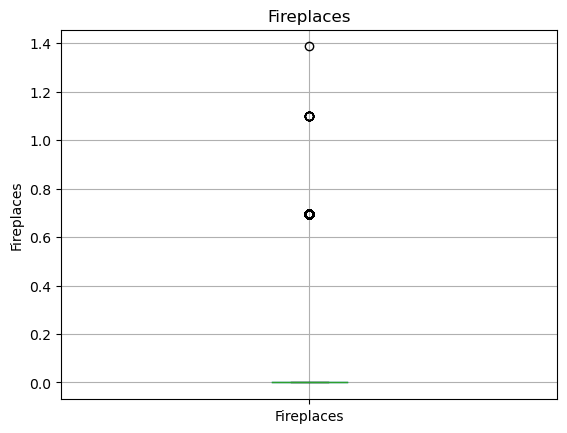

/Users/kushagra/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


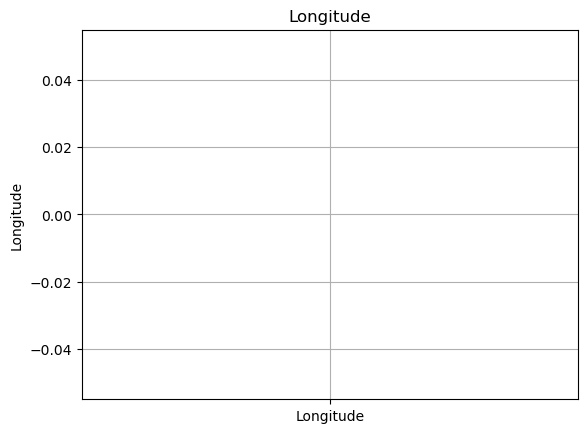

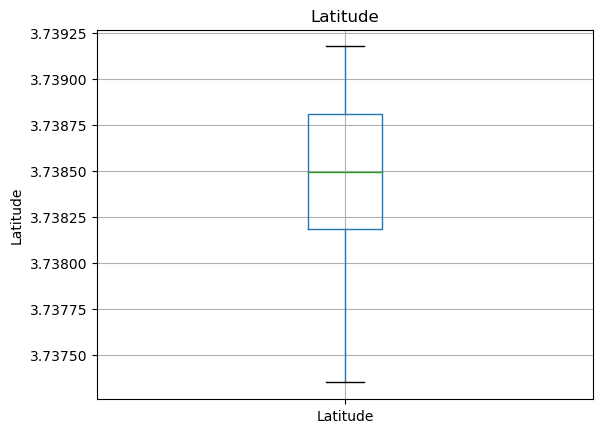

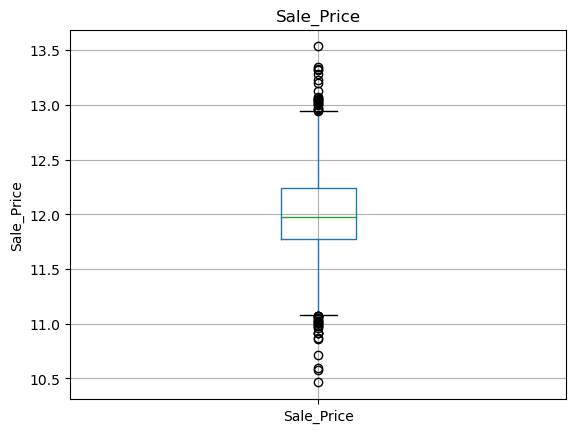

In [9]:
# Plotting Box plot to identify ouitliers
for feature in numerical_features:
    data=housing_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [10]:
#Identifying outliers in Sales Price
Q1 = Y_housing_data.quantile(0.25)
Q3 = Y_housing_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = housing_data[(Y_housing_data < lower_bound) | (Y_housing_data > upper_bound)]
print("Identified Outliers:")
print(outliers)

Identified Outliers:
      Lot_Frontage  Lot_Area Bldg_Type       House_Style Overall_Cond  \
15              47     53504    OneFam         Two_Story      Average   
37             110     14300    OneFam         One_Story      Average   
50             108     14774    OneFam         Two_Story      Average   
51              60     17433    OneFam         Two_Story      Average   
53              98     12256    OneFam         Two_Story      Average   
...            ...       ...       ...               ...          ...   
2073           105     11025    OneFam         Two_Story      Average   
2093            68     50271    OneFam         One_Story      Average   
2215            90     22950    OneFam  Two_and_Half_Fin    Excellent   
2272            60     19800    OneFam  Two_and_Half_Unf    Very_Good   
2384            42     26178    OneFam         Two_Story      Average   

      Year_Built Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
15          2003    Typical

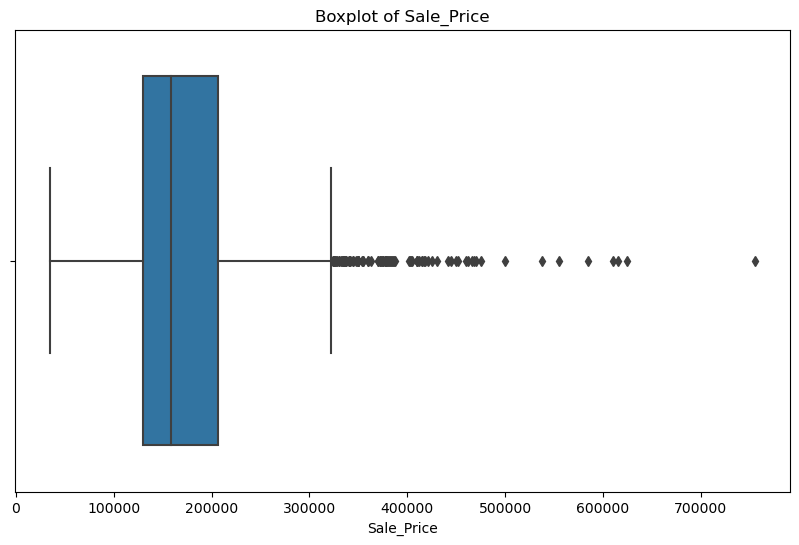

In [11]:
# Plotting Box plot of Sales Price, figure 3 in report
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['Sale_Price'])
plt.title(f'Boxplot of {"Sale_Price"}')
plt.show()

In [12]:
# Searching for missing values if there are any
features_with_na=[features for features in housing_data.columns if housing_data[features].isnull().sum()>1]
if not features_with_na:
    print("No missing values found.")
else:
    for feature in features_with_na:
        print(feature, np.round(housing_data[feature].isnull().mean(), 4),  ' % missing values')

No missing values found.


In [13]:
#storing all categorical variables of our dataset to categorical_features, figure 4 in report
categorical_features=[feature for feature in housing_data.columns if housing_data[feature].dtypes=='O']
housing_data[categorical_features].head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,OneFam,One_Story,Average,Typical
1,OneFam,One_Story,Above_Average,Typical
2,OneFam,One_Story,Above_Average,Typical
3,OneFam,One_Story,Average,Typical
4,OneFam,Two_Story,Average,Typical


In [14]:
# Ordinal encoding of categorical features, figure 5 in report
for feature in categorical_features:
    labels_ordered=housing_data.groupby([feature])['Sale_Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    housing_data[feature]=housing_data[feature].map(labels_ordered)
housing_data[['Bldg_Type','House_Style','Overall_Cond','Exter_Cond']].head()

,Bldg_Type,House_Style,Overall_Cond,Exter_Cond
0,3,4,7,3
1,3,4,4,3
2,3,4,4,3
3,3,4,7,3
4,3,6,7,3


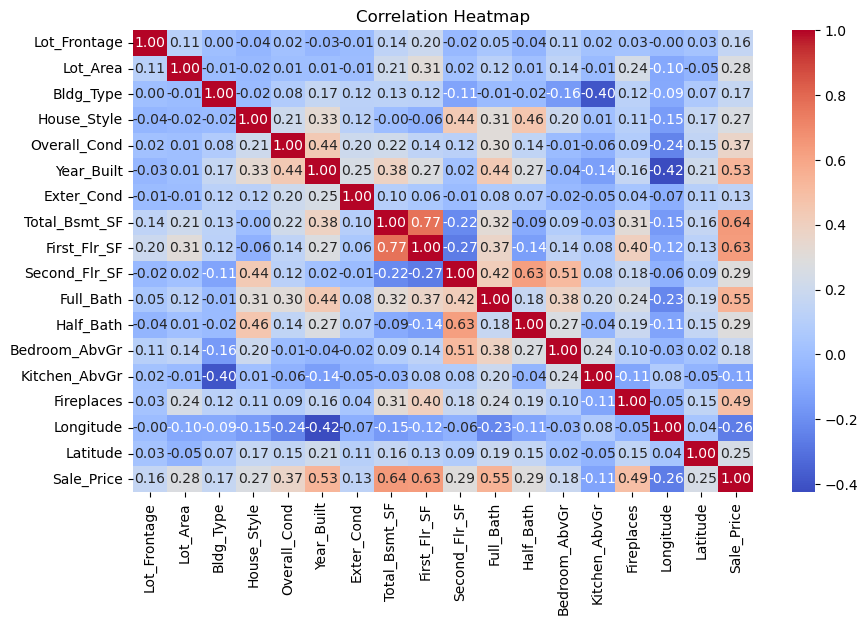

In [15]:
 # Visualize correlations between numeric variables, figure 6 in report
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Updating X_housing_data and Y_housing_data variables
X_housing_data=housing_data.drop(columns=['Sale_Price'])
Y_housing_data=housing_data['Sale_Price']

In [17]:
# applying min max scaler technique to normalize the data, figure 7 in report
scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(X_housing_data)
X_housing_data = pd.DataFrame(scaled_features_train, columns=X_housing_data.columns, index=X_housing_data.index)
housing_data=pd.concat([X_housing_data, Y_housing_data], axis=1)
X_housing_data.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
0,0.450479,0.142420,0.75,0.571429,0.875,0.637681,0.75,0.336868,0.379231,0.000000,0.25,0.0,0.500000,0.333333,0.50,0.634248,0.878439
1,0.255591,0.048246,0.75,0.571429,0.500,0.644928,0.75,0.275109,0.161216,0.000000,0.25,0.0,0.333333,0.333333,0.00,0.634231,0.865159
2,0.258786,0.060609,0.75,0.571429,0.500,0.623188,0.75,0.414535,0.285427,0.000000,0.25,0.5,0.500000,0.333333,0.00,0.637417,0.860541
3,0.297125,0.046087,0.75,0.571429,0.875,0.695652,0.75,0.658141,0.509466,0.000000,0.50,0.5,0.500000,0.333333,0.50,0.655281,0.842150
4,0.236422,0.058566,0.75,0.857143,0.875,0.905797,0.75,0.289457,0.170396,0.374466,0.50,0.5,0.500000,0.333333,0.25,0.468520,0.967717


In [18]:
# setting random seed as student number, and splitting the dataset into 80% train and 20% test  
student_number = 22200878
seed= np.random.seed(student_number)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_housing_data, Y_housing_data, test_size=0.2, random_state=seed)


In [19]:
#fitting model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Running train model 1 with all the variables and the original rows, figure 8 in report
X_train_with_intercept = sm.add_constant(X_train)
statsmodel_model = sm.OLS(y_train, X_train_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     517.8
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:12:22   Log-Likelihood:                -22647.
No. Observations:                1930   AIC:                         4.533e+04
Df Residuals:                    1912   BIC:                         4.543e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7913.0500   8059.776      0.982

In [21]:
# Running test model 1 with all the variables and the original rows
X_test_with_intercept = sm.add_constant(X_test)
statsmodel_model = sm.OLS(y_test, X_test_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          5.03e-173
Time:                        03:12:22   Log-Likelihood:                -5622.9
No. Observations:                 483   AIC:                         1.128e+04
Df Residuals:                     465   BIC:                         1.136e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.916e+04   1.77e+04      1.084

In [22]:
#dropping outliers from the dataset
housing_data_new = housing_data[(housing_data['Sale_Price'] >= lower_bound) & (housing_data['Sale_Price'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", housing_data_new.shape)

Shape of DataFrame after removing outliers: (2318, 18)


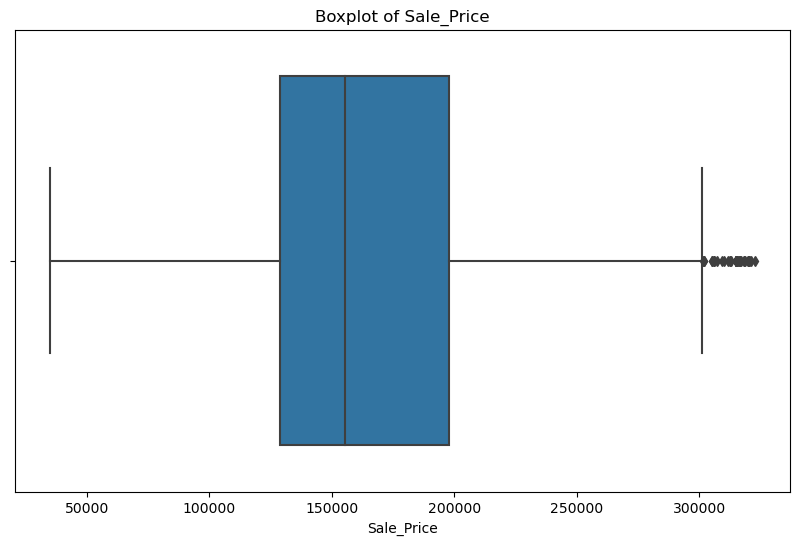

In [23]:
# Box plot after removing outliers, figure 9 in report
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data_new['Sale_Price'])
plt.title(f'Boxplot of {"Sale_Price"}')
plt.show()

In [24]:
# Dropping varibales because they have negative coefficients
X_train.drop(['House_Style','Total_Bsmt_SF'],axis=1,inplace=True)
X_test.drop(['House_Style','Total_Bsmt_SF'],axis=1,inplace=True)

In [25]:
# Running train model 2, figure 10 in report
X_train_with_intercept = sm.add_constant(X_train)
statsmodel_model = sm.OLS(y_train, X_train_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     517.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:12:22   Log-Likelihood:                -22745.
No. Observations:                1930   AIC:                         4.552e+04
Df Residuals:                    1914   BIC:                         4.561e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.438e+04   8420.265      1.708

In [26]:
# Running test model 2
X_test_with_intercept = sm.add_constant(X_test)
statsmodel_model = sm.OLS(y_test, X_test_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          9.57e-153
Time:                        03:12:22   Log-Likelihood:                -5676.8
No. Observations:                 483   AIC:                         1.139e+04
Df Residuals:                     467   BIC:                         1.145e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.448e+04   1.96e+04      1.761

In [27]:
# Calculating VIF to check multicollinearity, table 2 in report
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
    return vif_data
vif_df = calculate_vif(X_train)
print(vif_df)

         Variable        VIF
0    Lot_Frontage   3.926210
1        Lot_Area   2.292637
2       Bldg_Type  16.572061
3    Overall_Cond  20.238040
4      Year_Built  26.427846
5      Exter_Cond  28.353147
6    First_Flr_SF  13.374532
7   Second_Flr_SF   6.579395
8       Full_Bath  23.637156
9       Half_Bath   3.548024
10  Bedroom_AbvGr  20.842219
11  Kitchen_AbvGr  23.691632
12     Fireplaces   2.703844
13      Longitude   5.525741
14       Latitude   8.730544


In [28]:
# Excluding Full_Bath, Exter_Cond and Bldg_Type from the model
X_train.drop(['Full_Bath','Exter_Cond','Bldg_Type'],axis=1,inplace=True)
X_test.drop(['Full_Bath','Exter_Cond','Bldg_Type'],axis=1,inplace=True)

In [29]:
# Running Model 3, figure 11 in report
X_train_with_intercept = sm.add_constant(X_train)
statsmodel_model = sm.OLS(y_train, X_train_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     646.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:12:22   Log-Likelihood:                -22748.
No. Observations:                1930   AIC:                         4.552e+04
Df Residuals:                    1917   BIC:                         4.559e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.446e+04   6558.217      3.730

In [30]:
# Running test model 3
X_test_with_intercept = sm.add_constant(X_test)
statsmodel_model = sm.OLS(y_test, X_test_with_intercept).fit()
summary = statsmodel_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     154.3
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          2.04e-154
Time:                        03:12:22   Log-Likelihood:                -5680.6
No. Observations:                 483   AIC:                         1.139e+04
Df Residuals:                     470   BIC:                         1.144e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.453e+04   1.29e+04      1.904

In [31]:
# Predicting Housing Prices
model.fit(X_train, y_train)
Y_pred=model.predict(X_test)

In [32]:
# Assuming y_test and y_pred are your target and predicted values, calculating performance metrics table 5 in report
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 22387.841295686732
Mean Squared Error: 1021597813.610292
Root Mean Squared Error: 31962.443799094774
R-squared: 0.7849497784806578


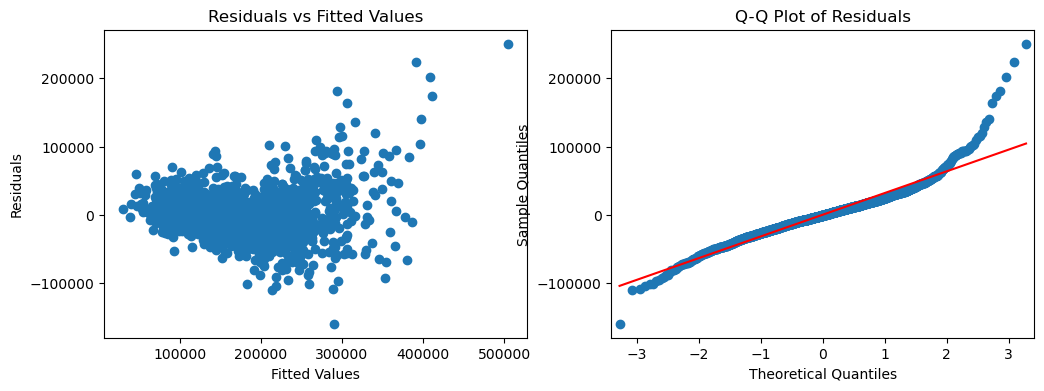

In [33]:
# Plotting residual vs Fitted and Q-Q Plot for validating gauss markov assumptions. figure 12 and 13 in report
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
residuals = results.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(results.fittedvalues, residuals)
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals vs Fitted Values')
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')
plt.show()

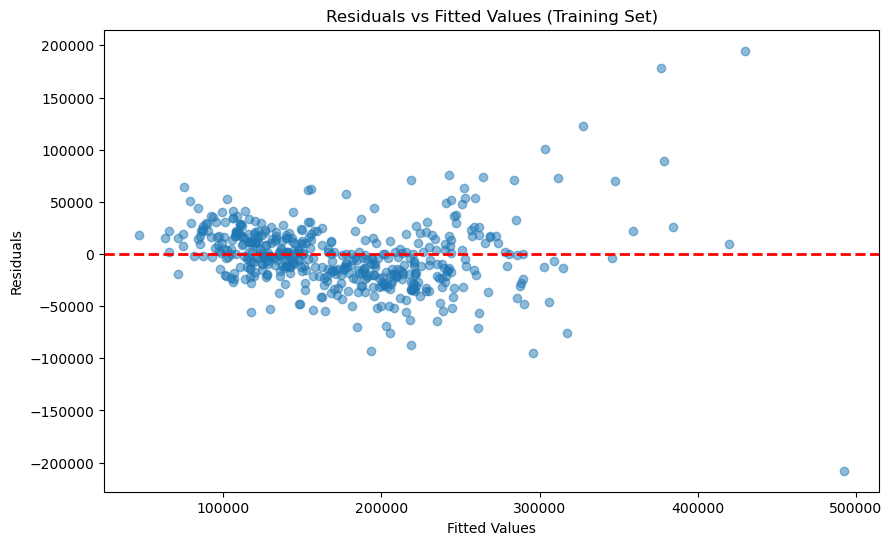

In [34]:
#Plotting Residuals vs Fitted Values (Training Set)
residuals_train = y_test-Y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

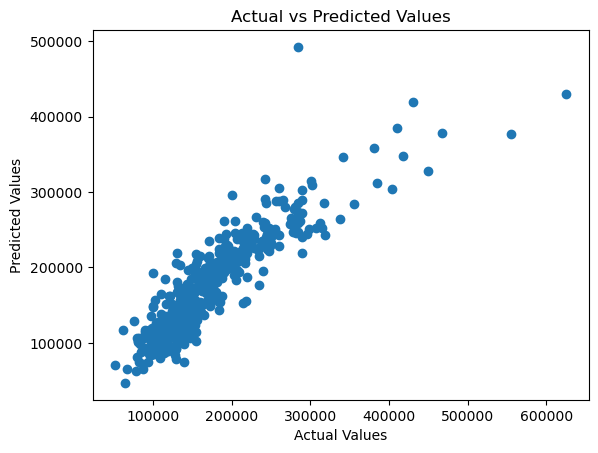

In [35]:
# plotting Actual vs Predicted Values, figure 14 in report
plt.scatter(y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [36]:
# Predicted Sales Price
Y_pred

array([245616.86157782, 116805.21539628, 180754.50630891, 218273.89082372,
       189473.62039959, 209704.8814062 , 120252.96469582, 194542.57132234,
       170779.58415383, 162251.72846369, 110947.74736774, 240794.48858305,
       268915.07783763, 314550.28027602, 116756.13947659,  93581.73910196,
       199521.70702338, 150714.16865983, 101734.78288088, 161683.58884631,
       128332.22123595, 130684.88392648, 194275.82041388, 147054.89281408,
       172419.27891101, 133168.2782941 , 121101.49604701, 129449.98644493,
       135147.72603538, 165735.09819731, 212934.63928201, 211966.47014087,
       195387.52822163, 142353.9372717 , 290285.55283455, 240353.82643461,
       135431.26798895, 149945.93223599, 147647.00897979, 125677.7382999 ,
       148821.77298486, 110857.77887028, 115164.74843506, 115085.45620839,
       224633.34683597, 123535.82147041, 188063.36665555, 113293.73216549,
       154555.81940278, 143389.50934253, 144436.03870312, 163767.65353896,
       127140.55600329, 1